In [101]:
########################################################################################################################################################
#                                                  Torben Falleth Olsen
#                                           Rapidly exploring Random Trees (RRT)
######################################################################################################################################################

import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [20,10]
#####################################
#        Tuning parameters
#####################################

Delta_q = 50


###### Region #####
x_span_min = 0.0 
x_span_max = 1000.0

y_span_min = 0.0
y_span_max = 1000.0

###### Goal #######
goal_bias = 0.05
goal = [900.0, 800.0]

###### Position ######
Position = [10.0,50.0]







In [102]:
#####################################
#        Initialize Tree
#####################################
root_parent = -1
RRT_tree = [Position]
Path = [goal]
Parent = [root_parent]
rand_p = []
span = [[x_span_min,x_span_max], [y_span_min,y_span_max]]



In [103]:
#####################################
#        Sample Random Point
#####################################
def random_sample():
    ran_vec = []
    q_rand = []
    n = np.random.rand(1,1)
    if (n < goal_bias):
        
       ran_vec.append(goal[0])
       ran_vec.append(goal[1])
    
    else:
        rand = np.random.rand(1,2)
        for i in range(0,2):
            ran_vec.append((goal[i]/abs(goal[i]))*(span[i][1] - span[i][0])*rand[0][i])

    rand_p.append([ran_vec[0],ran_vec[1]])
    q_rand.append(ran_vec[0])
    q_rand.append(ran_vec[1])
    
    return q_rand


In [104]:
#####################################
#      Calculate The Nearest Node
#####################################
def Calc_nearest_node(rand,tree):
    nearest = np.inf
    q_near = []
    for i in range(0,len(tree)):
        x = rand[0]-tree[i][0]
        y = rand[1]-tree[i][1]
        vec = [x,y]
        dist = norm(vec)
        
        if dist < nearest:
              q_near = tree[i]
              index = i
              nearest = dist
    return q_near,nearest,index


In [105]:
#####################################
#        Calculate The New Node
#####################################
def Calc_new_node(q_n,q_r,near):
    q_new = []
    x = q_r[0] - q_n[0]
    y = q_r[1] - q_n[1]
    x1 = x*(Delta_q/near)
    y1 = y*(Delta_q/near)
    vec0 = [x1,y1]
    vec = [x,y]
    
    
    if Delta_q <= near:
        
        q_new = [q_n[0] + vec0[0],q_n[1] + vec0[1]]
    else:
        q_new = [q_n[0] + vec[0],q_n[1] + vec[1]]
    return q_new



In [106]:
#####################################
#        Collision Avoidance
#####################################




In [107]:
#####################################
#        Add New Node To Tree
#####################################
def add_node_to_tree(q_new):
    RRT_tree.append(q_new)


In [108]:
#####################################
#          Connect Edge
#####################################
def connect_edge(parent_index):
    Parent.append(parent_index);


In [109]:
#####################################
#              Main
#####################################

def main():
    q_new = []
    cond = [[0.0,0.0]]
    
    for k in range(1, 200):
       
       q_rand = []
       q_rand = random_sample()

       q_near = []
       q_near,near,parent_index = Calc_nearest_node(q_rand,RRT_tree)

       q_new = []
       q_new = Calc_new_node(q_near,q_rand,near)

       add_node_to_tree(q_new)

       connect_edge(parent_index)
    
       if q_new == goal:
            break
    #####################################
    #           Create Path
    #####################################
    index = Parent[len(Parent)-1];
    
    while (Parent[index]>=0):
        ParentNode = RRT_tree[index]
        Path.append(ParentNode)
        index = Parent[index]
    ParentNode = RRT_tree[index]
    Path.append(ParentNode)
    
    #####################################
    #              Plot
    #####################################

    #plt.plot(t, yaw_hat, label="yaw_hat")
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 1001, 100)
    minor_ticks = np.arange(0, 1001, 10)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    ######### Set Plot Limit ###########
    plt.xlim([x_span_min, x_span_max])
    plt.ylim([y_span_min, y_span_max])
    
    ######### Plot Goal ###########
    plt.plot(goal[0], goal[1],marker="o", markersize=15,markeredgecolor="green",markerfacecolor="green",label="Goal")
    
    ######### Plot Position ###########
    plt.plot(Position[0], Position[1],marker="o", markersize=15,markeredgecolor="red",markerfacecolor="red",label="Position")
    
    ######### Plot Random Samples ###########
    #for i in range(0,len(q_rand)):
    #    plt.plot(rand_p[i][0],rand_p[i][1],marker="o", markersize=5,markeredgecolor="lightblue",markerfacecolor="lightblue")
        
    plt.plot(RRT_tree[0][0],RRT_tree[0][1],marker="o", markersize=7,markeredgecolor="blue",markerfacecolor="blue")
    
    ######### Plot Tree ###########
    for i in range(1,len(RRT_tree)):
        #print(Parent[i]) 
        #plt.plot(RRT_tree[i][0],RRT_tree[i][1],marker="o", markersize=7,markeredgecolor="blue",markerfacecolor="blue")
        plt.plot([RRT_tree[i][0],RRT_tree[Parent[i]][0]],[RRT_tree[i][1],RRT_tree[Parent[i]][1]],'bo', linestyle="--")
        
    ######### Plot Path ###########
    for i in range(0,len(Path)-1):
        plt.plot([Path[i][0],Path[i+1][0]],[Path[i][1],Path[i+1][1]],'ro',linewidth=2.0,linestyle="-")
        
    plt.legend()
    plt.show()

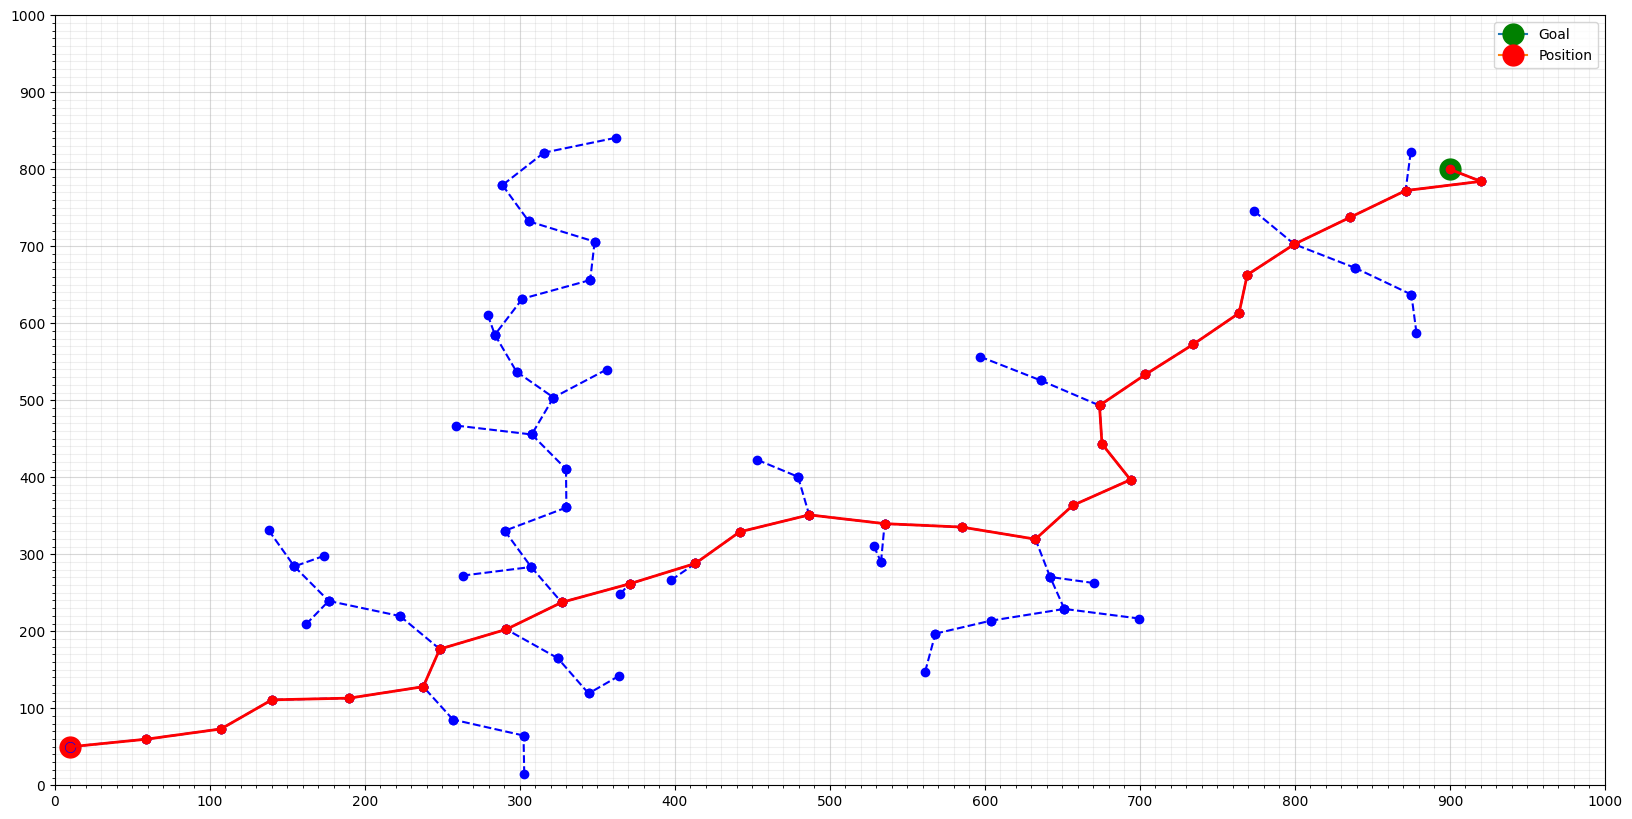

In [110]:
main()